

<h1><center><strong>Handling Outliers</strong></center></h1>

# **Table of Contents**

1. [Introduction](#Section1)<br><br>
2. [Standard Deviation Method](#Section2)<br><br>
3. [Interquartile Range Method](#Section3)<br><br>
4. [Automatic Outlier Detection](#Section4)<br><br>

<a id = Section1></a>
### **1. Introduction**

- An **outlier** is an observation that is **unlike** the other observations.

- It is **rare**, or **distinct**, or **does not fit** in some way.

- Outliers can have many **causes**, such as:
  
  - **Measurement or input error**.

  - **Data corruption**.

<br> 

- There is **no precise way** to **define** and **identify outliers** in general because of the specifics of each dataset.

  - Instead, you, or a domain expert, must **interpret** the **raw observations** and **decide** whether a **value** is an **outlier or not**.

- Nevertheless, we can use **statistical methods** to **identify** observations that appear to be **rare** or **unlikely** given the available data.

<br> 

- **Methods** to **Remove Outliers**:

  - **Standard Deviation** Method

  - **Interquartile Range** Method

  - **Automatic** Outlier Detection

**Creating a Test Dataset for Outlier Detection and Removal**

In [ ]:
import numpy as np

In [ ]:
# Seed the random number generator
np.random.seed(1)

# Generate univariate observations
data = 5 * np.random.randn(10000) + 50

<a id = Section2></a>
### **2. Standard Deviation Method**

- If we know that the **distribution** of values in the sample is **Gaussian** or **Gaussian-like**, we can use the **standard deviation** of the sample as a **cut-off** for identifying **outliers**.

- The **Gaussian distribution** has the **property** that the **standard deviation from** the **mean** can be used to reliably **summarize** the **percentage** of **values** in the sample.

- For example, within **one standard deviation** of the **mean** will cover **68%** of the **data**.

- We can cover more of the data sample if we expand the range as follows:

  - **1** Standard Deviation from the Mean: **68%**
    
  - **2** Standard Deviations from the Mean: **95%**
    
  - **3** Standard Deviations from the Mean: **99.7%**

<br> 

- A **value** that falls **outside** of **3 standard deviations** is part of the distribution, but it is an **unlikely** or **rare** event at approximately **1 in 370 samples**.

- **Three** standard deviations from the mean is a **common cut-off** in practice for identifying outliers in a Gaussian or Gaussian-like distribution.

- For **smaller** samples of **data**, perhaps a value of **2** standard deviations (**95%**) can be used, and for **larger samples**, perhaps a value of **4** standard deviations (**99.9%**) can be used.

- We can calculate the **mean** and **standard deviation** of a given sample.

- Then calculate the **cut-off** for identifying **outliers** as more than **3** standard deviations from the mean.

In [ ]:
# Calculate summary statistics
data_mean, data_std = np.mean(data), np.std(data)
print('Mean:', data_mean)
print('Standard Deviation:', data_std)

Mean: 50.04886328349552
Standard Deviation: 4.993929218440242


- The **mean** of the sample is **50.04** and the **standard deviation** is **4.99**

In [ ]:
# Identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
print('Cut Off Value from Mean:', cut_off)
print('Lower Bound:', lower)
print('Upper Bound:', upper)

Cut Off Value from Mean: 14.981787655320726
Lower Bound: 35.06707562817479
Upper Bound: 65.03065093881625


- The calculated **cut-off** value for identifying outliers is **14.98** from **mean**.

- Using this value:

  - The **lower bound** for outliers is **35.06**

  - The **upper bound** for outliers is **65.03**

- Any value **outside** these **bounds** will be treated as an **outlier**.

- **Filtering** out those **values** from the data that are **not within** the **defined limits**.

In [ ]:
# Identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 29


- We identified a total of **29 outliers** in our data.

- **Removing** the identified **outliers** from the data.

In [ ]:
# Remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 9971


- We have **removed** the **outliers** from the data and are left with **9971** samples.

<a id = Section3></a>
### **3. Interquartile Range Method**

- **Not all data** is **normal** or normal enough to treat it as being drawn from a Gaussian distribution.

- A good statistic for **summarizing** a **non-Gaussian distribution** sample of data is the **Interquartile Range**, or **IQR** for short.

- The IQR is calculated as the **difference between** the **75th** and the **25th percentiles** of the data and **defines** the **box** in a **box and whisker plot**.

- The **percentiles** can be **calculated** by **sorting** the **observations** and **selecting values** at **specific indices**.

  - The **50th percentile** is the **middle** value, or the **average** of the **two middle values** for an even number of examples.
  
  - If we had **10,000** samples, then the **50th percentile** would be the **average** of the **5000th** and **5001st** values.

- We refer to the **percentiles** as **quartiles** (**“quart” meaning 4**) because the **data** is **divided** into **four groups** via the **25th**, **50th** and **75th** values.

- The **IQR** defines the **middle 50%** of the data, or the body of the data.

- The **IQR** can be used to **identify outliers** by defining limits on the sample values that are a **factor k** of the IQR **below** the **25th** percentile or **above** the **75th** percentile.

  - The common value for the factor **k** is the value **1.5**.
  
  - A factor **k** of **3** or more can be used to identify values that are **extreme outliers** or **“far outs”** when described in the context of box and whisker plots.

- On a **box and whisker plot**, these limits are drawn as **fences** on the **whiskers** (or the lines) that are drawn from the box.

- **Values** that fall **outside** of **these** values are drawn as **dots**.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

Text(0.5, 1.0, 'Box and Whisker Plot')

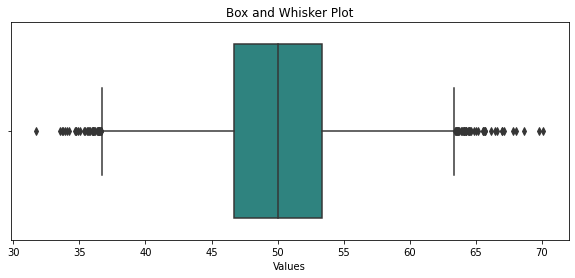

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(data, palette='viridis')
plt.xlabel('Values')
plt.title('Box and Whisker Plot')

- We can see the **quartiles** and **fences** in the boxplot.

- Also, the **points outside** the **fences** are drawn as **dots**, meaning they are **outliers**.

<br> 

- We will now **calculate** the **quartiles**, and **IQR** of our data.

In [ ]:
# Calculate Interquartile range
q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

Percentiles: 25th=46.685, 75th=53.359, IQR=6.674


- The **25th** percentile is at **46.685**, the **75th** percentile is at **53.359**

- The **IQR** for the data is **6.674**

<br> 

- Now, **calculating** the **outlier cut-off** value.

In [ ]:
# Calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print('Cut Off Value from 25th and 75th Quartiles:', cut_off)
print('Lower Bound:', lower)
print('Upper Bound:', upper)

Cut Off Value from 25th and 75th Quartiles: 10.01050258029353
Lower Bound: 36.67487321019591
Upper Bound: 63.369546757645324


- The calculated **cut-off** value for identifying outliers is **10.01** from the 25th and 75th quartiles.

- Using this value:

  - The **lower bound** for outliers is **36.67**

  - The **upper bound** for outliers is **63.36**

- Any value **outside** these **bounds** will be treated as an **outlier**.

- **Filtering** out those **values** from the data that are **not within** the **defined limits**.

In [ ]:
# Identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 81


- We identified a total of **81 outliers** in our data.

- **Removing** the identified **outliers** from the data.

In [ ]:
# Remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 9919


- We have **removed** the **outliers** from the data and are left with **9919** samples.

<a id = Section4></a>
### **4. Automatic Outlier Detection**

#### **Using LOF (Local Outlier Factor)**

- The **local outlier factor**, or **LOF** for short, is a technique that attempts to **harness** the idea of **nearest neighbors** for **outlier detection**.

- **Each example** is **assigned** a **scoring** of how **isolated** or how **likely** it is to be **outliers** based on the **size** of its local **neighborhood**.

- Those examples with the **largest score** are more likely to be **outliers**.

- The scikit-learn library provides an implementation of this approach in the **LocalOutlierFactor** class.

In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import LocalOutlierFactor

**Loading the Dataset**

- We will use the **Boston Housing** regression problem that has **13 inputs** and **one numerical target**.

- It requires learning the relationship between suburb characteristics and house prices.

In [ ]:
# load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/Boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


- The dataset has **506** samples, and **14** variables.

- The `medv` is the **target** variable.

- First, we will retrieve the **array** of dataset **values**.

In [ ]:
# Retrieve the array
data = df.values

- **Splitting** the dataset into **feature matrix, X** and **target variable, y**.

In [ ]:
# Split into input and output elements
X, y = data[:, :-1], data[:, -1]

In [ ]:
# Summarize the shape of the dataset
print(X.shape, y.shape)

(506, 13) (506,)


- **Splitting** the data into **train** and **test sets**.

In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
# Summarize the shape of the training dataset
print(X_train.shape, y_train.shape)

(339, 13) (339,)


- We will **fit** a **linear regression** algorithm on the **trainig** set.

- And, then **evaluate model performance** by making a **predictions** on the **test** data and evaluate the predictions using the **mean absolute error** (**MAE**).

In [ ]:
# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Making **predictions** on the test set.

In [ ]:
# Evaluate the model
yhat = model.predict(X_test)

- **Evaluating** the **predictions** made by the model on test set.

In [ ]:
# Evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 3.417


- In this case, we can see that the model achieved a **MAE** of about **3.417**.

**Identifying Outliers using LOF**

- We will `LocalOutlierFactor` model to make a **prediction** on the **training** dataset, marking each row in the training dataset as **normal** (**1**) or an **outlier** (**-1**).

In [ ]:
# Identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

- We can then use these **predictions** to **remove** all **outliers** from the training dataset.

In [ ]:
# Select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

In [ ]:
# Summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

(305, 13) (305,)


- Original train set had **339** samples, but **after outlier removal** we are left with **305** samples.

- This implies that **34 rows** were **removed** from the train set.

- We can now **fit** and **evaluate** the model as per normal.

In [ ]:
# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Evaluate the model
yhat = model.predict(X_test)

In [ ]:
# Evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 3.356


- The model achieved a **MAE** of about **3.417**, which is **lower** than what was obtained before outlier removal.

#### **Using IsolationForest**

- **Isolation Forest** is an **unsupervised** learning algorithm that belongs to the **ensemble decision trees** family.

- It explicitly **isolates anomalies** instead of profiling and constructing normal points and regions by **assigning** a **score** to each data point.

- It takes **advantage** of the fact that **anomalies** are the **minority data points** and that they have **attribute-values** that are very **different** from those of **normal** instances.

- This algorithm works **great** with very **high dimensional datasets** and it proved to be a very **effective** way of **detecting anomalies**.

In [ ]:
import numpy as np

In [ ]:
from sklearn.ensemble import IsolationForest

**Generating Data**

In [ ]:
np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

In [ ]:
# Summarize the shape of the dataset
print(random_data.shape)

(50000, 2)


**Applying IsolationForest to our Data**

In [ ]:
clf = IsolationForest(max_samples=100, random_state=1, contamination='auto')
preds = clf.fit_predict(random_data)
preds

array([-1,  1, -1, ...,  1,  1,  1])

- This code will **output** the **predictions** for **each data point** in an array.

- If the result is **-1**, it means that this specific data point is an **outlier**.

- If the result is **1**, then it means that the data point is **not an outlier**.

- We can then use the **predictions** to **remove** all **outliers** from the data.

In [ ]:
# Select all rows that are not outliers
mask = preds != -1
outliers_removed = random_data[mask, :]

In [ ]:
# Summarize the shape of the dataset after outlier removal
print(outliers_removed.shape)

(35501, 2)


- **14499** samples were **removed** from the data, as they were labelled as **outliers**.